## Logistic Regression Challenge

In [46]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import random
from sklearn.metrics import confusion_matrix
#import the required packages here
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

### Task 1: Download the data and load them into Python.
You can find the data [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bX0MzUEhVdmpCc3c/view?usp=sharing&resourcekey=0-BirYbvtYO-hSEt09wpEBRw).

**Note**
- Features and response variables are in different files.
- Be careful about number of spaces between the values in the file.

In [2]:
data_cols = pd.read_csv(r"C:\Users\bevli\Downloads\logistic_regression_exercise\Smartphone Sensor Data\features.txt", sep = ' ', header = None)

In [3]:
data_cols

,0,1
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [4]:
data = pd.read_csv(r"C:\Users\bevli\Downloads\logistic_regression_exercise\Smartphone Sensor Data\train\X_train.txt", sep = ' ',header = None, skipinitialspace = True)

In [5]:
data

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [6]:
data.columns = data_cols.iloc[:,1]
data

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [7]:
data_y = pd.read_csv(r"C:\Users\bevli\Downloads\logistic_regression_exercise\Smartphone Sensor Data\train\y_train.txt", sep = ' ',skipinitialspace = True, header = None)

In [8]:
data_y.head()

,0
0,5
1,5
2,5
3,5
4,5


In [9]:
data_y.rename(columns={0:'y'},inplace=True)
y=data_y.y
print (y)

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: y, Length: 7352, dtype: int64


### Task 2: Create a binary target variable: categories 1,2,3 --> 1, categories 4,5,6 --> 0 
This will represent a binary variable indicating if person is walking or not.

In [10]:
y.replace([1,2,3], value = 1, inplace = True)

In [11]:
y.replace([4,5,6], value = 0, inplace = True)

### Task 3

+ Create a Univariate Binary Logistic Regression with feature number 54, which represents `tGravityAcc-min()-Y`: gravity acceleration signals in direction of Y.
+ Compare the results of the Logistic regressions from different Python packages (sklearn, statsmodel).
+ Plot the **fit** of predicted probabilities to the original values.

In [12]:
from sklearn import linear_model

In [15]:
#select feature 54
X = data.iloc[:,53]
X.isnull().sum().sum()

0

In [16]:
#convert series to numpy array
X = X.values.reshape(-1,1)
X

array([[-0.12321341],
       [-0.11489334],
       [-0.11489334],
       ...,
       [-0.21600415],
       [-0.21054246],
       [-0.21214853]])

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [87]:
pred_prob_sk = linear_model.LogisticRegression().fit(X_train, y_train)

#predict_proba returns probability of being 0 or 1
prob_sk = pred_prob_sk.predict_proba(X)

prob_sk_0 = []
prob_sk_1 = []

i=0
while i < len(prob_sk):
    prob_sk_0.append(prob_sk[i][0])
    prob_sk_1.append(prob_sk[i][1])
    i += 1

C:\Users\bevli\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bevli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


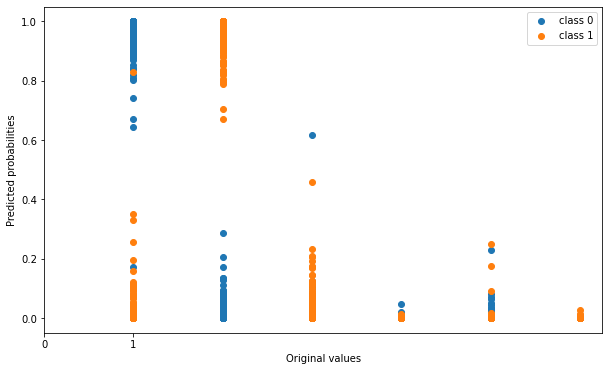

In [88]:
#plotting

fig, ax =plt.subplots(figsize = (10,6))

plot1 = ax.scatter(y, prob_sk_0)
plot2 = ax.scatter(y, prob_sk_1)
ax.set_xlabel('Original values')
ax.set_ylabel('Predicted probabilities')
ax.set_xticks([0,1])
ax.legend([plot1,plot2],['class 0','class 1'])


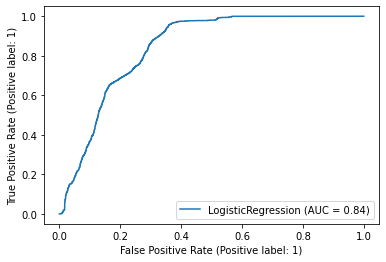

In [19]:
#plot roc_curve

from sklearn.metrics import plot_roc_curve
plot_roc_curve(pred_prob_sk,X,y)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Task 4
- Try to fit a Binary Logistic Regression with all the features? How many are significant?

In [22]:
X = data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

In [25]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)
#
y_pred=logreg.predict(X_test)

In [26]:
accuracy_score(y_test,y_pred)

1.0

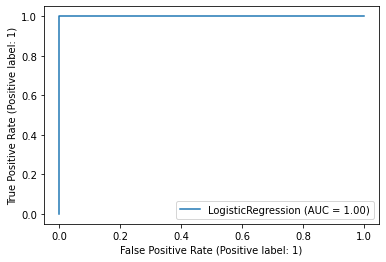

In [27]:
plot_roc_curve(logreg, X_test, y_test)

### Task 5
Now, let's fit Multinomial Logistic regression to predict all categories. Firstly, we can start with **Univariate** model for these features number separately:
+ 4
+ 54
- 19

Check the contingency matrix to see the effect of particular features!! (each feature can be good in predicting different categories)

In [33]:
y = pd.read_csv(r"C:\Users\bevli\Downloads\logistic_regression_exercise\Smartphone Sensor Data\train\y_train.txt",header=None)

In [34]:
y[0].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: 0, dtype: int64

### Univariate Model feature 54

In [61]:
data_54 = data.iloc[:,54].values.reshape(-1,1)

In [62]:
X_train,X_test,y_train,y_test=train_test_split(data_54,y,test_size=0.25,random_state=0,stratify=y)

In [63]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial')
# fit the model on the whole dataset
model.fit(X_train, y_train)

C:\Users\bevli\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(multi_class='multinomial')

In [64]:
# predict the class label
yhat = model.predict(X_test)

In [65]:
from sklearn import metrics
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, yhat))

Multinomial Logistic regression Test Accuracy ::  0.37758433079434167


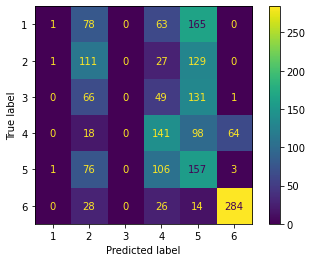

In [66]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

### Univariate Model feature 4

Multinomial Logistic regression Test Accuracy ::  0.37704026115342765


C:\Users\bevli\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


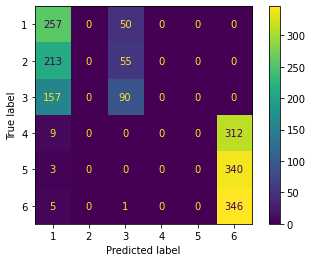

In [68]:
data_4 = data.iloc[:,4].values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(data_4,y,test_size=0.25,random_state=0,stratify=y)

# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial')
# fit the model on the whole dataset
model.fit(X_train, y_train)

# predict the class label
yhat = model.predict(X_test)

from sklearn import metrics
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, yhat))

from sklearn.metrics import confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

### Univariate Model feature 19

Multinomial Logistic regression Test Accuracy ::  0.48585418933623503


C:\Users\bevli\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


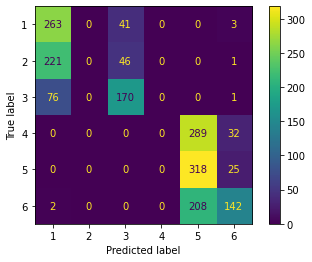

In [70]:
data_19 = data.iloc[:,19].values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(data_19,y,test_size=0.25,random_state=0,stratify=y)

# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial')
# fit the model on the whole dataset
model.fit(X_train, y_train)

# predict the class label
yhat = model.predict(X_test)

from sklearn import metrics
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, yhat))

from sklearn.metrics import confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

### Task 6

Fit the Multinomial Logistic Regression model again. Now, try to choose **all** the important features we have in the dataset. Compare with your peers on who will get the best predictions with the smallest number of features?

In [72]:
X = data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

In [73]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial')
# fit the model on the whole dataset
model.fit(X_train, y_train)

C:\Users\bevli\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\bevli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [74]:
# predict the class label
yhat = model.predict(X_test)

In [75]:
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, yhat))

Multinomial Logistic regression Test Accuracy ::  0.9836779107725789


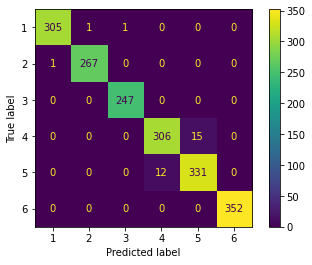

In [76]:
plot_confusion_matrix(model, X_test, y_test)

### Task 7 (Stretch)
Create your own function for Stepwise selection. Use either sklearn or statsmodel.